# Stock Prediction Using Stacked LSTM

In [5]:
## Python Bharat Intern Data Science Project ( KAPIL GUPTA)
## MAKE SURE TO RUN THE CODE FROM STARTING; NOT FROM THE MIDDLE.

## DATA COLLECTION
import pandas as pd
tesla_df=pd.read_csv("https://raw.githubusercontent.com/kapilgupta50347/Bharat_Intern/main/TSLA.csv")
print(tesla_df)
print('\n',tesla_df.isna().sum()) # For checking any NULL values in each column

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1    

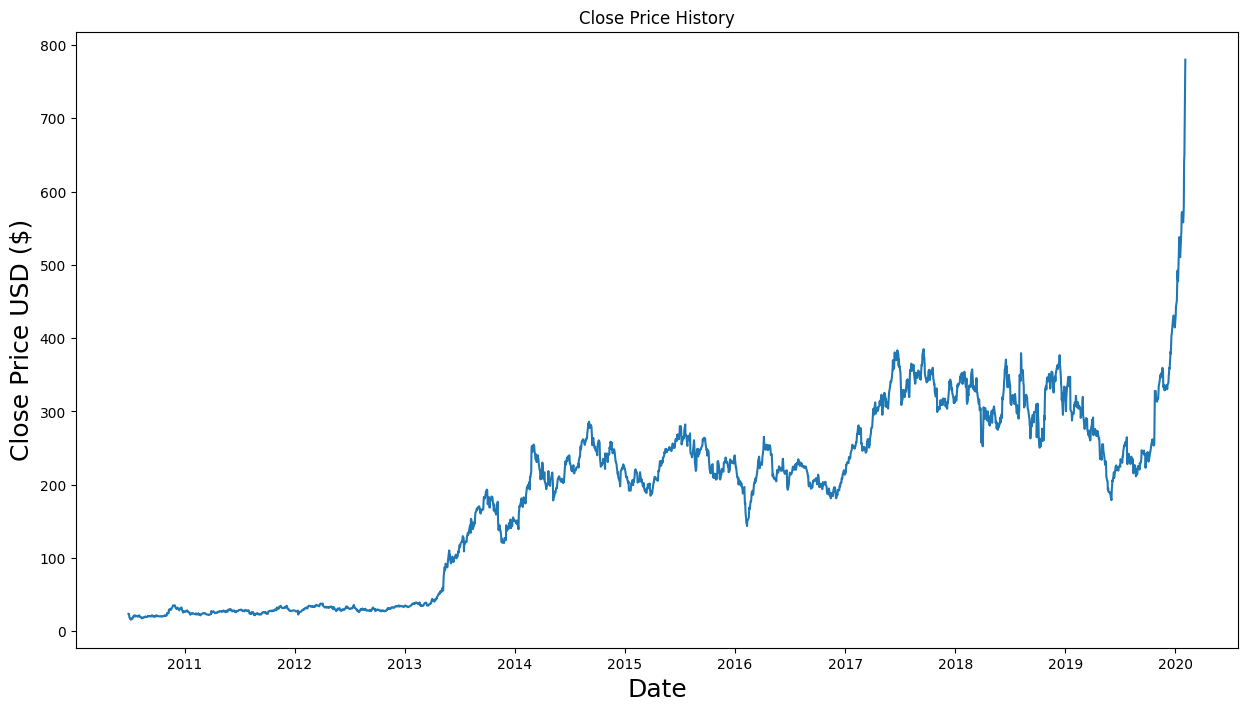

In [6]:
tesla_df['Date']=pd.to_datetime(tesla_df['Date'])
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title('Close Price History')
plt.plot(tesla_df['Date'],tesla_df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.show()

In [7]:
df=tesla_df.reset_index()['Close']
print(df.shape)

(2416,)


In [9]:
# LSTM are sensitive to the scale of the data, so we are transforming the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

# Splitting dataset into train and test split
train_size=int(len(df)*0.7)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]
print(train_size,',',test_size)

(2416, 1)
1691 , 725


In [10]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step):
  x,y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    x.append(a)
    y.append(dataset[i+time_step,0])
  return np.array(x),np.array(y)

# Reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

print(x_train)
print(x_train.shape)
print(y_train.shape)

[[0.01058623 0.01050772 0.00806072 ... 0.01962837 0.0181497  0.01791416]
 [0.01050772 0.00806072 0.0044491  ... 0.0181497  0.01791416 0.01843758]
 [0.00806072 0.0044491  0.00040565 ... 0.01791416 0.01843758 0.019877  ]
 ...
 [0.2331327  0.23985868 0.24569484 ... 0.30236848 0.29979062 0.29820728]
 [0.23985868 0.24569484 0.23985868 ... 0.29979062 0.29820728 0.3014525 ]
 [0.24569484 0.23985868 0.24115414 ... 0.29820728 0.3014525  0.31693274]]
(1590, 100)
(1590,)


In [11]:
# Reshape input to be [samples,time steps, features] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [12]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 15s 212ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 2/100
25/25 [==============================] - 4s 167ms/step - loss: 5.3197e-04 - val_loss: 0.0017
Epoch 3/100
25/25 [==============================] - 5s 188ms/step - loss: 3.3619e-04 - val_loss: 0.0017
Epoch 4/100
25/25 [==============================] - 5s 201ms/step - loss: 2.9860e-04 - val_loss: 0.0016
Epoch 5/100
25/25 [==============================] - 5s 188ms/step - loss: 2.8891e-04 - val_loss: 0.0018
Epoch 6/100
25/25 [==============================] - 5s 190ms/step - loss: 2.7746e-04 - val_loss: 0.0017
Epoch 7/100
25/25 [==============================] - 5s 190ms/step - loss: 2.5480e-04 - val_loss: 0.0019
Epoch 8/100
25/25 [==============================] - 5s 188ms/step - loss: 2.4369e-04 - val_loss: 0.0017
Epoch 9/100
25/25 [==============================] - 5s 190ms/step - loss: 2.4787e-04 - val_loss: 0.0016
Epoch 10/100
25/25 [==============================] - 5s 1

In [14]:
# Lets do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))

# Test Data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

20/20 [==============================] - 1s 41ms/step
164.27040363001487
303.31012431699133


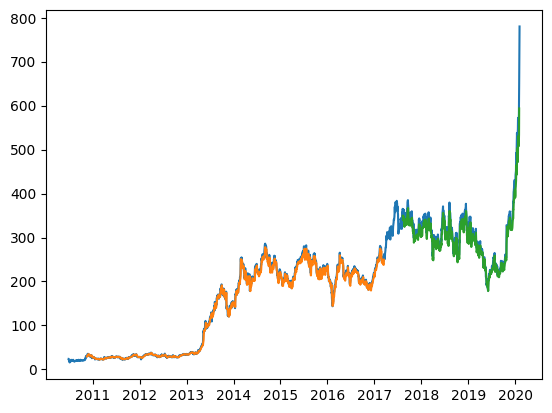

In [15]:
# PLOTTING
# Shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

# Shift test predictions for plotting
testPredictPlot=np.empty_like(df)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :]=test_predict

# Plot baseline and predictions
plt.plot(tesla_df['Date'],scaler.inverse_transform(df))
plt.plot(tesla_df['Date'],trainPredictPlot)
plt.plot(tesla_df['Date'],testPredictPlot)
plt.show()

In [16]:
print(len(test_data))
x_input=test_data[625:].reshape(1,-1)
print(x_input.shape)

input=list(x_input)
input=input[0].tolist()

# Demonstrate prediction for next 30 days
output=[]
n_steps=100
i=0
while(i<30):
  if(len(input)>100):
    x_input=np.array(input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(1,n_steps,1)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    input.extend(yhat[0].tolist())
    input=input[1:]
    output.extend(yhat.tolist())
    i=i+1
  
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    input.extend(yhat[0].tolist())
    print(len(input))
    output.extend(yhat.tolist())
    i=i+1

print(output)

725
(1, 100)
[0.90748084]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.683224

2416


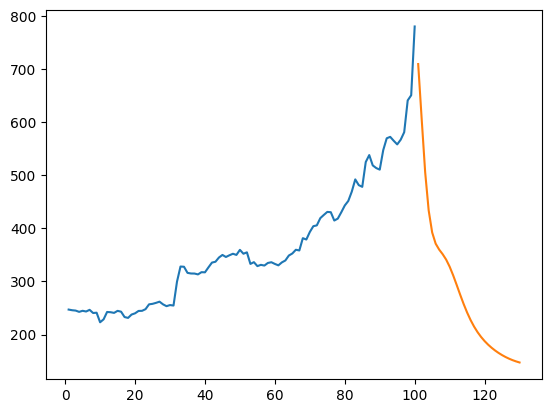

In [17]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

print(len(df))

plt.plot(day_new,scaler.inverse_transform(df[2316:]))
plt.plot(day_pred,scaler.inverse_transform(output))

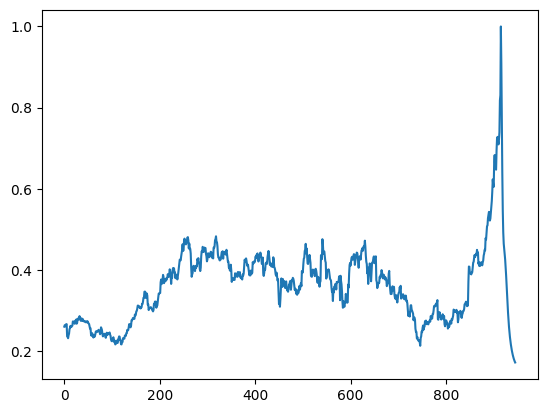

In [18]:
df1=df.tolist()
df1.extend(output)
plt.plot(df1[1500:])

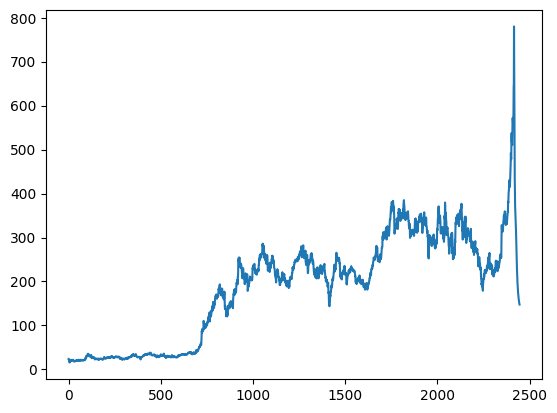

In [19]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)